In [31]:
#import Library 
import os
import cv2
import pytesseract
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [93]:
#Image import
image = cv2.imread('assi3.png')
#cv2.imshow('image1',image)

In [95]:
#GRAY and Gaussian filtering denoising
Gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) 
Gray = cv2.GaussianBlur(Gray, (5, 5), 0)

In [97]:
#Picture show
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [99]:
#show GRAY
cv_show('edged',Gray)
#as we could see,it is better!

In [101]:
# edge detection 
edged = cv2.Canny(Gray, 75, 200)
cv_show('edged',edged)

In [103]:
#Apply adaptive threshold processing
thresh = cv2.adaptiveThreshold(edged, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2) 
cv_show('thresh',thresh)

In [105]:
#Contour detection
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [107]:
# Traverse the contour and draw a bounding box  
for contour in contours:   
    if cv2.contourArea(contour) < 500:  
        continue  
  
    # Get bounding box 
    x, y, w, h = cv2.boundingRect(contour)  
      
    # Draw a bounding box 
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [109]:
#data finding
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [111]:
custom_config = r'--oem 3 --psm 6'  
text = pytesseract.image_to_string(edged, config=custom_config, lang='eng') 

In [113]:
print("Detected Text:")  
print(text)
#Great!

Detected Text:
nlp-tutorial
oO
in
Q
Yensorriow
alp-tutorial fs a tutorial for whe ts studying NLP(Natural Langquage Pracessing) using Pytorch, Most of the models
in NLP were implemented with less than 100 lines of code(exceat comments or blank lines)
© [08-14-2020] Old TensorFlow vi cade is archived in the erchive folder. For beginner readability, only pytorch
version 1.0 or higher is supported.
Curriculum - (Example Purpose)
1. Baste Embedding Model
© 1-1. NNLIVI(Neual Network Lenquage Model) - Predict Next Word
© Peper - A Neural Probabilistic Language Model(2003)
® Colab - NNLM.Lipyal
© 1-2, Word2Vec(Skip-gram) - Embedding Words and Show Graph
© Peper - Distributed Representetions of Words and Phrases and their Compositionality(2013)
® Colab - Werd2Vec.ipynb
o 1-3. Festiext(Applicstion Level) - Sentence Classification
© Peper - Bag of Tricks for Efficient Text Clessification(2016)
© Colab - FastText.igynio



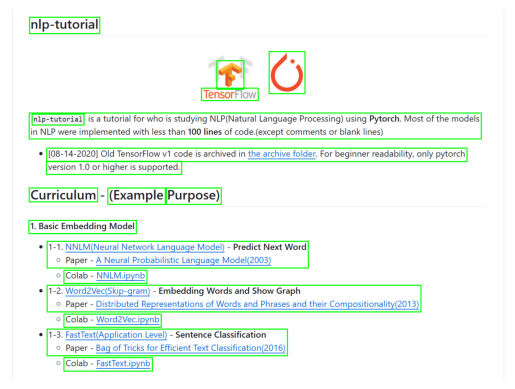

In [117]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  
plt.axis('off')  
plt.show()

In [119]:
#Another way to draw box
rowimage = image
#cv_show('rowimage',rowimage)

decimg = rowimage
h,w,c = decimg.shape
boxes = pytesseract.image_to_boxes(decimg)
for b in boxes.splitlines():
    b = b.lstrip('~').strip().split(' ')
    decimg = cv2.rectangle(decimg, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv_show('decimg',decimg)

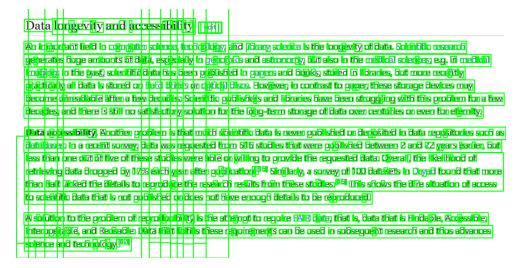

In [90]:
plt.imshow(cv2.cvtColor(decimg, cv2.COLOR_BGR2RGB))  
plt.axis('off')  
plt.show()